**Import Library yang Dibutuhkan**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Membaca file**

In [ ]:
df = pd.read_csv('/content/Amazon Sale Report.csv', dtype={'Unnamed: 22': str}) # Data laporan penjualan amazon.

In [ ]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

Terdapat beberapa kolom yang memiliki null-values yaitu: **Courier Status, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, fulfilled-by, dan Unnamed:22**. Kemudian kolom date memiliki tipe data object akan diubah menjadi date, dan kolom B2B dari bool menjadi integer (0 atau 1).

In [ ]:
# Ubah format date
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [ ]:
# Ubah kolom B2B menjadi integer
df['B2B'] = df['B2B'].astype(int)

**1. Descriptive Statistics**

In [ ]:
# Memisahkan kolom numerikal dan kategorikal
nums = ['Qty', 'Amount', 'ship-postal-code','B2B']
cats = ['Order ID', 'Status', 'Fulfilment', 'Sales Channel ',
           'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
           'Courier Status', 'currency', 'ship-city',
           'ship-state', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22']

In [ ]:
df[nums].describe()

,Qty,Amount,ship-postal-code,B2B
count,128975.000000,121180.000000,128942.000000,128975.000000
mean,0.904431,648.561465,463966.236509,0.006753
std,0.313354,281.211687,191476.764941,0.081901
min,0.000000,0.000000,110001.000000,0.000000
25%,1.000000,449.000000,382421.000000,0.000000
50%,1.000000,605.000000,500033.000000,0.000000
75%,1.000000,788.000000,600024.000000,0.000000
max,15.000000,5584.000000,989898.000000,1.000000


In [ ]:
df[cats].describe()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


Kolom kategorikal dengan nilai tunggal akan dihapus karena tidak memberikan informasi yang berguna untuk analisis atau pemodelan dan tidak memiliki hubungan statistik dengan variabel target karena tidak ada perbedaan nilai untuk dipelajari model. Kolom tersebut adalah currency, ship-country, fulfilled-by, dan Unnamed: 22. Beberapa kolom lainnya yang dirasa tidak berpengaruh adalah
1. Order ID : ID adalah transaksi unik yang hanya berfungsi sebagai identifikasi, bisa dihapus karena tidak memberikan informasi yang berguna untuk prediksi.
2. Style, SKU, ASIN bisa dipertimbangkan untuk dihapus karena dapat diwakilkan dengan category dan size.

In [ ]:
# Filter data selain kolom tertentu
df1 = df.drop(columns=['Order ID', 'Style', 'SKU', 'ASIN', 'currency', 'ship-country', 'fulfilled-by', 'promotion-ids', 'Unnamed: 22'], errors='ignore')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Category            128975 non-null  object        
 7   Size                128975 non-null  object        
 8   Courier Status      122103 non-null  object        
 9   Qty                 128975 non-null  int64         
 10  Amount              121180 non-null  float64       
 11  ship-city           128942 non-null  object        
 12  ship-state          128942 non-null  object        
 13  ship-postal-code    128942 no

**Melihat Distribusi pada Kolom Target Status**

In [ ]:
# Mengecek nilai unik pada kolom 'Status'
df1['Status'].value_counts()


,count
Status,
Shipped,77804
Shipped - Delivered to Buyer,28769
Cancelled,18332
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


Relevansi Bisnis:

1. Dalam konteks bisnis e-commerce atau retail, fokus utama adalah pada pengalaman konsumen dan efisiensi proses logistik.
2. Kategori seperti **Delivered to Buyer**, **Returned to Seller**, dan **Rejected by Buyer** mencerminkan status akhir transaksi yang sangat relevan untuk mengevaluasi kepuasan konsumen dan efektivitas pengiriman.
3. Status lain mungkin lebih terkait dengan proses internal (seperti packing, shipped, dll.) dan kurang memberikan insight dari sisi pengalaman konsumen.

Simplifikasi Model:

1. Mengurangi jumlah kelas target dari 13 menjadi 3 akan membuat proses klasifikasi lebih sederhana dan meningkatkan performa model.
2. Dengan jumlah kelas yang terlalu banyak, model bisa menjadi terlalu kompleks (high variance) dan lebih sulit diinterpretasi.
3. Fokus pada 3 kelas utama juga membantu mencegah masalah ketidakseimbangan kelas yang berlebihan.

Actionable Insights:

* Ketiga status yang dipilih memungkinkan tim bisnis untuk mengambil tindakan yang jelas dan dapat ditindaklanjuti:
* Returned to Seller: Mengidentifikasi masalah kualitas produk atau proses pengiriman yang buruk.
* Rejected by Buyer: Menganalisis alasan penolakan, seperti ketidakpuasan terhadap deskripsi produk atau masalah pengiriman.
* Delivered to Buyer: Mengukur tingkat keberhasilan pengiriman dan kepuasan pelanggan.

**Melakukan Filtering Status**

In [ ]:
# Menghapus baris dengan Status yang tidak termasuk dalam daftar yang diinginkan
status_terpilih = ['Shipped - Delivered to Buyer',
                   'Shipped - Returned to Seller',
                   'Shipped - Rejected by Buyer']

df_filtered = df1[df1['Status'].isin(status_terpilih)]

# Mengatur ulang indeks agar dimulai dari 0
df_filtered.reset_index(drop=True, inplace=True)

df_filtered

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,0
1,7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,S,Shipped,1,399.0,HYDERABAD,TELANGANA,500032.0,0
2,12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,XS,Shipped,1,399.0,Amravati.,MAHARASHTRA,444606.0,0
3,14,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,L,Shipped,1,771.0,MUMBAI,MAHARASHTRA,400053.0,0
4,15,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,6XL,Shipped,1,544.0,GUNTAKAL,ANDHRA PRADESH,515801.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30728,128872,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Ethnic Dress,S,Shipped,1,999.0,ALLUR,ANDHRA PRADESH,524315.0,0
30729,128873,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,S,Shipped,1,1523.0,ALLUR,ANDHRA PRADESH,524315.0,0
30730,128874,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,S,Shipped,1,854.0,ALLUR,ANDHRA PRADESH,524315.0,0
30731,128887,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Top,M,Shipped,1,518.0,NOIDA,UTTAR PRADESH,201301.0,0


**1. Data Cleansing**

**a. Handle missing values**

In [ ]:
df_filtered.columns

Index(['index', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [ ]:
# Identifikasi missing values
df_filtered.isna().sum()

,0
index,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,11
Qty,0


Terdapat 5 kolom yang memiliki missing values, solusi yang akan diberikan adalah langsung menghapus kolom ini karena jumlahnya hanya sedikit sehingga dirasa tidak terlalu mempengaruhi analisis dan pemodelan kedepannya dan lebih praktis

In [ ]:
# Menghapus baris dengan missing values
df_filtered = df_filtered.dropna()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30712 entries, 0 to 30732
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               30712 non-null  int64         
 1   Date                30712 non-null  datetime64[ns]
 2   Status              30712 non-null  object        
 3   Fulfilment          30712 non-null  object        
 4   Sales Channel       30712 non-null  object        
 5   ship-service-level  30712 non-null  object        
 6   Category            30712 non-null  object        
 7   Size                30712 non-null  object        
 8   Courier Status      30712 non-null  object        
 9   Qty                 30712 non-null  int64         
 10  Amount              30712 non-null  float64       
 11  ship-city           30712 non-null  object        
 12  ship-state          30712 non-null  object        
 13  ship-postal-code    30712 non-null  float64       


**b. Handle duplicated data**

In [ ]:
# Filter semua data duplikat berdasarkan semua kolom
duplicates_data = df_filtered[df_filtered.duplicated(keep=False)]

# Melihat hasil pengurutan
print(duplicates_data)


Empty DataFrame
Columns: [index, Date, Status, Fulfilment, Sales Channel , ship-service-level, Category, Size, Courier Status, Qty, Amount, ship-city, ship-state, ship-postal-code, B2B]
Index: []


Karena tidak ada data yang duplikat atau memiliki nilai yang sama pada lebih dari satu baris, maka lanjut ke tahapan berikutnya

**c. Handle outliers**

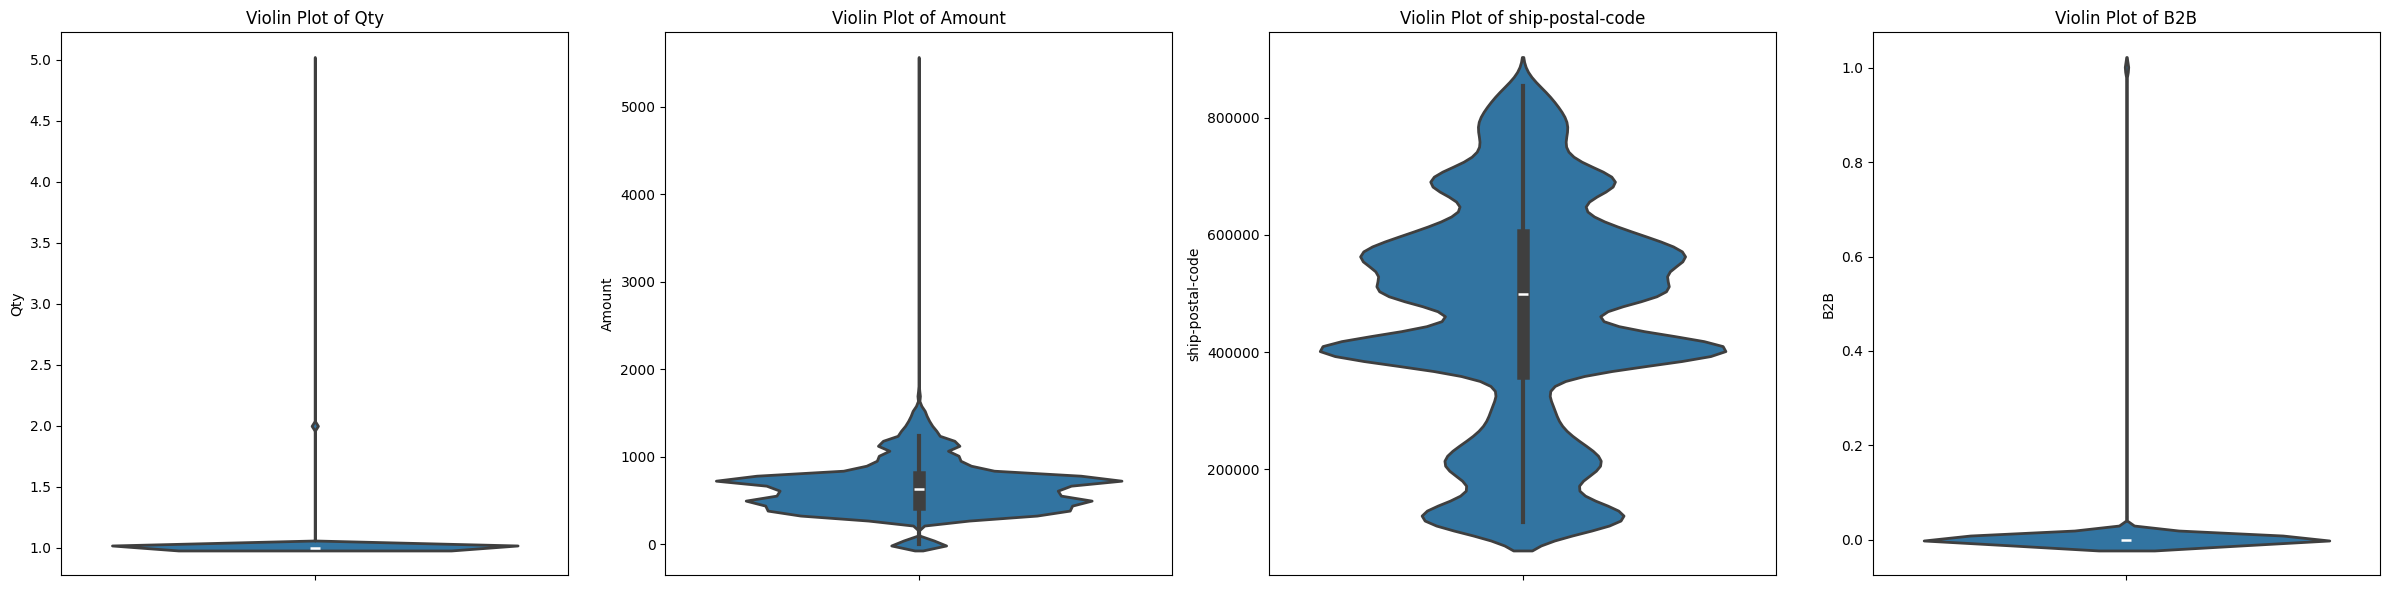

In [ ]:
# Membuat figure untuk violin plot setiap kolom numerik
plt.figure(figsize=(6 * len(nums), 6))  # Memperbesar width untuk setiap kolom numerik

for i in range(len(nums)):
    plt.subplot(1, len(nums), i + 1)  # Mengatur posisi subplot
    sns.violinplot(data=df_filtered, y=nums[i], linewidth=2, orient='v')
    plt.title(f'Violin Plot of {nums[i]}')
    plt.ylabel(nums[i])

plt.tight_layout()
plt.show()


Outlier pada kolom Qty dan Amount akan dipertahankan di dataset transaksi Amazon penting karena:

1. **Mencerminkan Realitas Bisnis**: Transaksi besar atau harga tinggi adalah bagian alami dari e-commerce
2. **Menambah Wawasan**: Outlier bisa memberikan informasi penting tentang pola pembelian.
3. **Pengaruh pada Pemodelan**: Menghapus outlier dapat menghilangkan variasi penting yang mempengaruhi model dan keputusan bisnis.
4. **Natural Variability**: Transaksi dengan nilai ekstrem sering terjadi di pasar nyata, dan perlu dipertahankan untuk representasi yang akurat.

**d. Feature transformation**

Log Transformation adalah pilihan yang paling umum dan efektif jika Qty dan Amount memiliki variasi besar atau nilai transaksi dengan harga sangat besar. Dengan log transformasi, distribusi harga akan lebih seimbang, dan outlier tidak akan mempengaruhi model secara berlebihan.

In [ ]:
# Log Transformation pada kolom Qty dan Amount
df_filtered.loc[:, 'Qty_log'] = np.log1p(df_filtered['Qty'])
df_filtered.loc[:, 'Amount_log'] = np.log1p(df_filtered['Amount'])

<ipython-input-20-dbda3f3644e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Qty_log'] = np.log1p(df_filtered['Qty'])
<ipython-input-20-dbda3f3644e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Amount_log'] = np.log1p(df_filtered['Amount'])


**Membuat ViolinPlot untuk mengecek grafik setelah transformasi**

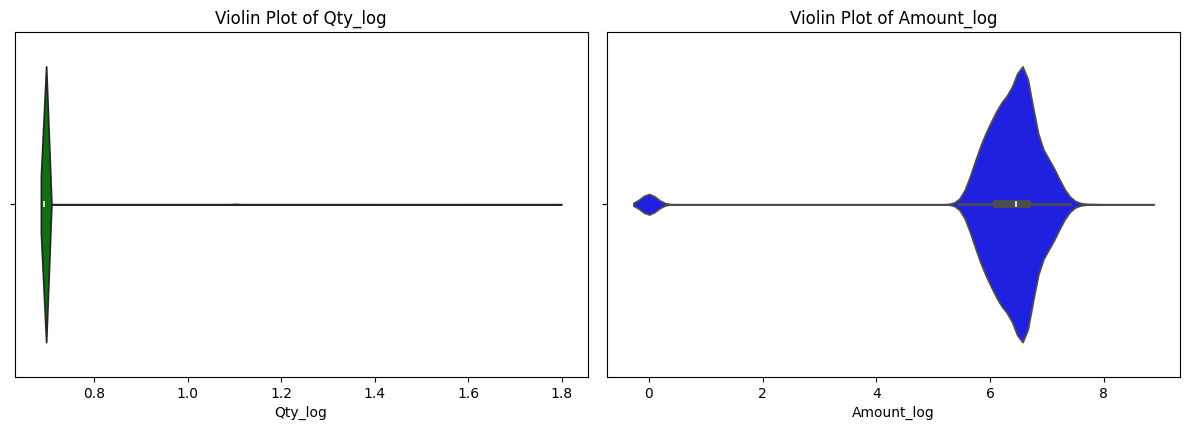

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat violin plot untuk Qty_log, Amount_log, Qty_sqrt, Amount_sqrt
plt.figure(figsize=(12, 8))

# Plot Qty_log
plt.subplot(2, 2, 1)
sns.violinplot(x=df_filtered['Qty_log'], color='green')
plt.title('Violin Plot of Qty_log')

# Plot Amount_log
plt.subplot(2, 2, 2)
sns.violinplot(x=df_filtered['Amount_log'], color='blue')
plt.title('Violin Plot of Amount_log')

plt.tight_layout()
plt.show()

**e. Feature encoding**

In [ ]:
nums_new = ['Qty','Amount','ship-postal-code', 'B2B', 'Qty_log', 'Amount_log']
cats_new = ['Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'ship-city', 'ship-state']

In [ ]:
df_filtered[cats_new].describe()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state
count,30712,30712,30712,30712,30712,30712,30712,30712,30712
unique,3,1,1,1,8,11,1,4157,56
top,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Set,M,Shipped,BENGALURU,MAHARASHTRA
freq,28754,30712,30712,30712,11406,5628,30712,2442,5218


Setelah dilakukan filtering terhadap tiga kolom status yang diinginkan, terlihat banyak kolom kategorikal seperti Fulfilment, Sales Channel, ship-service-level, dan Courier Status nilainya hanya berisikan 1 kategori saja sehingga tidak akan berpengaruh kedepannya dalam pemodelan dan diputuskan dihapus. Untuk kolom ship-city dikarenakan dapat diperkecil menjadi ship-state akan dipilih salah satu saja, yaitu ship-state.

In [ ]:
# Filter data selain kolom tertentu
df_new = df_filtered.drop(columns=['Fulfilment','Sales Channel','ship-service-level','ship-city','Courier Status'], errors='ignore')

In [ ]:
df_new['ship-state'].value_counts()

,count
ship-state,
MAHARASHTRA,5218
KARNATAKA,3819
UTTAR PRADESH,2658
TELANGANA,2561
TAMIL NADU,2558
KERALA,1763
DELHI,1633
WEST BENGAL,1314
ANDHRA PRADESH,1284


In [ ]:
# Membuat mapping region untuk setiap state
region_mapping = {
    # North
    'DELHI': 'North', 'Haryana': 'North', 'RAJASTHAN': 'North', 'UTTARAKHAND': 'North',
    'JAMMU & KASHMIR': 'North', 'HIMACHAL PRADESH': 'North', 'Ladakh': 'North',
    'punjab': 'North', 'Punjab': 'North', 'RJ': 'North', 'Chandigarh': 'North',
    'Punjab/Mohali/Zirakpur': 'North',

    # South
    'MAHARASHTRA': 'South', 'TELANGANA': 'South', 'TAMIL NADU': 'South', 'KARNATAKA': 'South',
    'KERALA': 'South', 'ANDHRA PRADESH': 'South', 'PUDUCHERRY': 'South', 'GOA': 'South',

    # West
    'Gujarat': 'West', 'RAJASTHAN': 'West', 'MADHYA PRADESH': 'West', 'CHHATTISGARH': 'West',
    'Goa': 'West', 'Dadra and Nagar': 'West',

    # East
    'WEST BENGAL': 'East', 'ODISHA': 'East', 'JHARKHAND': 'East', 'BIHAR': 'East',
    'ASSAM': 'East', 'MEGHALAYA': 'East', 'TRIPURA': 'East', 'ARUNACHAL PRADESH': 'East',
    'SIKKIM': 'East', 'MIZORAM': 'East', 'LAKSHADWEEP': 'East'
}

# Menambahkan kolom baru 'Region' berdasarkan mapping
df_new['Region'] = df_new['ship-state'].map(region_mapping)

# Mengecek jika ada state yang tidak masuk ke mapping
unmapped_states = df_new[df_new['Region'].isnull()]['ship-state'].unique()

# Menampilkan hasil mapping dan state yang tidak terpetakan
print("State yang tidak masuk ke dalam mapping:")
print(unmapped_states)

# Menampilkan distribusi region
print("\nDistribusi Region:")
print(df_new['Region'].value_counts())


State yang tidak masuk ke dalam mapping:
['HARYANA' 'UTTAR PRADESH' 'PUNJAB' 'DADRA AND NAGAR' 'CHANDIGARH'
 'ANDAMAN & NICOBAR ' 'MANIPUR' 'Delhi' 'Bihar' 'Rajasthan' 'NAGALAND'
 'New Delhi' 'rajasthan' 'LADAKH' 'delhi' 'Manipur' 'orissa' 'Odisha'
 'Arunachal Pradesh' 'Sikkim' 'bihar' 'Arunachal pradesh' 'Orissa']

Distribusi Region:
Region
South    17550
East      3282
West      2842
North     2472
Name: count, dtype: int64


In [ ]:
# Mengganti nilai yang tidak terpetakan menjadi 'Others'
df_new['Region'] = df_new['Region'].fillna('Others')

# Menampilkan distribusi region setelah penggantian
print("\nDistribusi Region setelah mengganti yang tidak terpetakan dengan 'Others':")
print(df_new['Region'].value_counts())



Distribusi Region setelah mengganti yang tidak terpetakan dengan 'Others':
Region
South     17550
Others     4566
East       3282
West       2842
North      2472
Name: count, dtype: int64


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30712 entries, 0 to 30732
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             30712 non-null  int64         
 1   Date              30712 non-null  datetime64[ns]
 2   Status            30712 non-null  object        
 3   Sales Channel     30712 non-null  object        
 4   Category          30712 non-null  object        
 5   Size              30712 non-null  object        
 6   Qty               30712 non-null  int64         
 7   Amount            30712 non-null  float64       
 8   ship-state        30712 non-null  object        
 9   ship-postal-code  30712 non-null  float64       
 10  B2B               30712 non-null  int64         
 11  Qty_log           30712 non-null  float64       
 12  Amount_log        30712 non-null  float64       
 13  Region            30712 non-null  object        
dtypes: datetime64[ns](1), float

In [ ]:
new_nums = ['Qty','Amount','ship-postal-code', 'B2B', 'Qty_log', 'Amount_log']
new_cats = ['Category', 'Size', 'Region']

In [ ]:
df_new['Size'].value_counts()

,count
Size,
M,5628
L,5554
XL,5205
XXL,4267
3XL,3803
S,3766
XS,2081
6XL,161
5XL,99


**Label Encoding untuk kolom Size**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menentukan urutan size yang sesuai (dari yang terkecil hingga yang terbesar)
size_order = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'Free']

# Membuat dictionary untuk memetakan size ke angka
size_mapping = {size: idx for idx, size in enumerate(size_order)}

# Gantikan nilai dengan label numerik menggunakan mapping
df_new['Size_encoded'] = df_new['Size'].map(size_mapping)


In [ ]:
df_new.head()

,index,Date,Status,Sales Channel,Category,Size,Qty,Amount,ship-state,ship-postal-code,B2B,Qty_log,Amount_log,Region,Size_encoded
0,1,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,3XL,1,406.0,KARNATAKA,560085.0,0,0.693147,6.008813,South,6
1,7,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,S,1,399.0,TELANGANA,500032.0,0,0.693147,5.991465,South,1
2,12,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,XS,1,399.0,MAHARASHTRA,444606.0,0,0.693147,5.991465,South,0
3,14,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Set,L,1,771.0,MAHARASHTRA,400053.0,0,0.693147,6.648985,South,3
4,15,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,6XL,1,544.0,ANDHRA PRADESH,515801.0,0,0.693147,6.300786,South,9


**One Hot Encoding untuk kolom Category dan Region**

In [ ]:
# One-Hot Encoding untuk kolom 'Category' dengan hasil bertipe int
df_new = pd.get_dummies(df_new, columns=['Category'], prefix='Category', drop_first=True)

# One-Hot Encoding untuk kolom 'Region' dengan hasil bertipe int
df_new = pd.get_dummies(df_new, columns=['Region'], prefix='Region', drop_first=True)

In [ ]:
# Ubah hasil encoding menjadi tipe integer
for col in df_new.filter(like='Category_').columns:
    df_new[col] = df_new[col].astype(int)

for col in df_new.filter(like='Region_').columns:
    df_new[col] = df_new[col].astype(int)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30712 entries, 0 to 30732
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   30712 non-null  int64         
 1   Date                    30712 non-null  datetime64[ns]
 2   Status                  30712 non-null  object        
 3   Sales Channel           30712 non-null  object        
 4   Size                    30712 non-null  object        
 5   Qty                     30712 non-null  int64         
 6   Amount                  30712 non-null  float64       
 7   ship-state              30712 non-null  object        
 8   ship-postal-code        30712 non-null  float64       
 9   B2B                     30712 non-null  int64         
 10  Qty_log                 30712 non-null  float64       
 11  Amount_log              30712 non-null  float64       
 12  Size_encoded            30712 non-null  int64      

In [ ]:
df_new

,index,Date,Status,Sales Channel,Size,Qty,Amount,ship-state,ship-postal-code,B2B,...,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Region_North,Region_Others,Region_South,Region_West
0,1,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,3XL,1,406.0,KARNATAKA,560085.0,0,...,0,0,0,0,0,1,0,0,1,0
1,7,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,S,1,399.0,TELANGANA,500032.0,0,...,0,0,0,0,0,1,0,0,1,0
2,12,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,XS,1,399.0,MAHARASHTRA,444606.0,0,...,0,0,0,0,0,1,0,0,1,0
3,14,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,L,1,771.0,MAHARASHTRA,400053.0,0,...,0,0,1,0,0,0,0,0,1,0
4,15,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,6XL,1,544.0,ANDHRA PRADESH,515801.0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30728,128872,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,S,1,999.0,ANDHRA PRADESH,524315.0,0,...,1,0,0,0,0,0,0,0,1,0
30729,128873,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,S,1,1523.0,ANDHRA PRADESH,524315.0,0,...,0,0,1,0,0,0,0,0,1,0
30730,128874,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,S,1,854.0,ANDHRA PRADESH,524315.0,0,...,0,0,1,0,0,0,0,0,1,0
30731,128887,2022-05-31,Shipped - Delivered to Buyer,Amazon.in,M,1,518.0,UTTAR PRADESH,201301.0,0,...,0,0,0,1,0,0,0,1,0,0


**f. Handle class imbalance**

In [ ]:
df_new['Status'].value_counts()

,count
Status,
Shipped - Delivered to Buyer,28754
Shipped - Returned to Seller,1947
Shipped - Rejected by Buyer,11


**Mengubah kolom status menjadi Numerikal dengan LabelEncoder**

In [ ]:
# Mapping manual untuk kolom 'Status'
status_mapping = {
    'Shipped - Delivered to Buyer': 3,
    'Shipped - Returned to Seller': 2,
    'Shipped - Rejected by Buyer': 1
}

# Menggunakan mapping pada kolom 'Status'
df_new['Status_encoded'] = df_new['Status'].map(status_mapping)

# Cek mapping
print(status_mapping)

{'Shipped - Delivered to Buyer': 3, 'Shipped - Returned to Seller': 2, 'Shipped - Rejected by Buyer': 1}


In [ ]:
df_new

,index,Date,Status,Sales Channel,Category,Size,Qty,Amount,ship-state,ship-postal-code,B2B,Qty_log,Amount_log,Region,Size_encoded,Status_encoded
0,1,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,3XL,1,406.0,KARNATAKA,560085.0,0,0.693147,6.008813,South,6,3
1,7,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,S,1,399.0,TELANGANA,500032.0,0,0.693147,5.991465,South,1,3
2,12,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,XS,1,399.0,MAHARASHTRA,444606.0,0,0.693147,5.991465,South,0,3
3,14,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Set,L,1,771.0,MAHARASHTRA,400053.0,0,0.693147,6.648985,South,3,3
4,15,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,kurta,6XL,1,544.0,ANDHRA PRADESH,515801.0,0,0.693147,6.300786,South,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30728,128872,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,Ethnic Dress,S,1,999.0,ANDHRA PRADESH,524315.0,0,0.693147,6.907755,South,1,3
30729,128873,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,Set,S,1,1523.0,ANDHRA PRADESH,524315.0,0,0.693147,7.329094,South,1,3
30730,128874,2022-06-01,Shipped - Delivered to Buyer,Amazon.in,Set,S,1,854.0,ANDHRA PRADESH,524315.0,0,0.693147,6.751101,South,1,3
30731,128887,2022-05-31,Shipped - Delivered to Buyer,Amazon.in,Top,M,1,518.0,UTTAR PRADESH,201301.0,0,0.693147,6.251904,Others,2,3


In [ ]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = df_new.drop(['Date', 'Status', 'Sales Channel ', 'Size', 'ship-state', 'ship-postal-code', 'Status_encoded'], axis=1)  # Semua fitur kecuali target
y = df_new['Status_encoded']  # Target

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Periksa distribusi kelas setelah SMOTE
from collections import Counter
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))


Distribusi kelas setelah SMOTE: Counter({3: 28754, 2: 28754, 1: 28754})


Proses oversampling menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani class imbalance pada dataset. SMOTE bertujuan untuk:

1. Mengatasi ketidakseimbangan kelas, yang dapat memengaruhi kinerja model machine learning.
2. Menghindari bias terhadap kelas mayoritas.
3. Meningkatkan kemampuan model untuk memprediksi kelas minoritas.

**2. Feature Engineering**

In [ ]:
df_new.head()


,index,Date,Status,Sales Channel,Size,Qty,Amount,ship-state,ship-postal-code,B2B,...,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Region_North,Region_Others,Region_South,Region_West
0,1,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,3XL,1,406.0,KARNATAKA,560085.0,0,...,0,0,0,0,0,1,0,0,1,0
1,7,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,S,1,399.0,TELANGANA,500032.0,0,...,0,0,0,0,0,1,0,0,1,0
2,12,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,XS,1,399.0,MAHARASHTRA,444606.0,0,...,0,0,0,0,0,1,0,0,1,0
3,14,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,L,1,771.0,MAHARASHTRA,400053.0,0,...,0,0,1,0,0,0,0,0,1,0
4,15,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,6XL,1,544.0,ANDHRA PRADESH,515801.0,0,...,0,0,0,0,0,1,0,0,1,0


**Feature Selection**

Beberapa fitur yang dapat dibuang adalah:
1. index (Tidak relevan untuk analisis, hanya merupakan indeks dataset)
2. ship-postal-code (sudah diwakilkan state)
3. Sales Channel (sama semua, yaitu Amazon.in sehingga tidak berpengaruh ke analisis)
4. Status (sudah di-encode, hapus saja)

In [ ]:
# Drop kolom yang tidak relevan
df_new2 = df_new.drop(['index', 'Size', 'ship-state', 'ship-postal-code', 'Sales Channel ', 'Status'], axis=1)


In [ ]:
df_new2

,Date,Qty,Amount,B2B,Qty_log,Amount_log,Size_encoded,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Region_North,Region_Others,Region_South,Region_West,Status_encoded
0,2022-04-30,1,406.0,0,0.693147,6.008813,6,0,0,0,0,0,0,1,0,0,1,0,0
1,2022-04-30,1,399.0,0,0.693147,5.991465,1,0,0,0,0,0,0,1,0,0,1,0,0
2,2022-04-30,1,399.0,0,0.693147,5.991465,0,0,0,0,0,0,0,1,0,0,1,0,0
3,2022-04-30,1,771.0,0,0.693147,6.648985,3,0,0,0,1,0,0,0,0,0,1,0,0
4,2022-04-30,1,544.0,0,0.693147,6.300786,9,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30728,2022-06-01,1,999.0,0,0.693147,6.907755,1,0,1,0,0,0,0,0,0,0,1,0,0
30729,2022-06-01,1,1523.0,0,0.693147,7.329094,1,0,0,0,1,0,0,0,0,0,1,0,0
30730,2022-06-01,1,854.0,0,0.693147,6.751101,1,0,0,0,1,0,0,0,0,0,1,0,0
30731,2022-05-31,1,518.0,0,0.693147,6.251904,2,0,0,0,0,1,0,0,0,1,0,0,0


**Feature Extraction**

In [ ]:
df_new2.columns

Index(['Date', 'Qty', 'Amount', 'B2B', 'Qty_log', 'Amount_log', 'Size_encoded',
       'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
       'Category_Set', 'Category_Top', 'Category_Western Dress',
       'Category_kurta', 'Region_North', 'Region_Others', 'Region_South',
       'Region_West', 'Status_encoded'],
      dtype='object')

**Mengekstrak bulan dari kolom Date**

In [ ]:
print(df_new2.columns)
df_new2.columns = df_new2.columns.str.strip()  # Menghapus spasi ekstra
print(df_new2.head())  # Menampilkan beberapa baris pertama untuk memeriksa
# Pastikan kolom 'Date' ada dan dalam format datetime
df_new2['Date'] = pd.to_datetime(df_new2['Date'], errors='coerce')

# Ambil bulan dari kolom 'Date'
df_new2['Month_Encoded'] = df_new2['Date'].dt.month

# Pastikan Date dalam format datetime
df_new2['Date'] = pd.to_datetime(df_new2['Date'], errors='coerce')

# Ambil bulan dari kolom Date
df_new2['Month_Encoded'] = df_new2['Date'].dt.month
# Ambil nama bulan (misalnya, Januari, Februari, dll)
df_new2['Month_Name'] = df_new2['Date'].dt.strftime('%B')



Index(['Date', 'Qty', 'Amount', 'B2B', 'Qty_log', 'Amount_log', 'Size_encoded',
       'Status_encoded', 'Category_Bottom', 'Category_Ethnic Dress',
       'Category_Saree', 'Category_Set', 'Category_Top',
       'Category_Western Dress', 'Category_kurta', 'Region_North',
       'Region_Others', 'Region_South', 'Region_West'],
      dtype='object')
        Date  Qty  Amount  B2B   Qty_log  Amount_log  Size_encoded  \
0 2022-04-30    1   406.0    0  0.693147    6.008813             6   
1 2022-04-30    1   399.0    0  0.693147    5.991465             1   
2 2022-04-30    1   399.0    0  0.693147    5.991465             0   
3 2022-04-30    1   771.0    0  0.693147    6.648985             3   
4 2022-04-30    1   544.0    0  0.693147    6.300786             9   

   Status_encoded  Category_Bottom  Category_Ethnic Dress  Category_Saree  \
0               3                0                      0               0   
1               3                0                      0               0 

**Membuat fitur baru Day_Type**

In [ ]:
# Menambahkan kolom baru untuk memetakan weekdays atau weekend
df_new2['Day_Type'] = df_new2['Date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
# Menambahkan kolom numerik (0=Weekday, 1=Weekend)
df_new2['Is_Weekend'] = (df_new2['Date'].dt.weekday >= 5).astype(int)